In [1]:
#Naive Bayes Classifier : It is classification algorithm
#work on conditional probability
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset
df=pd.read_csv("iris.csv")
#to show first 5 records
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


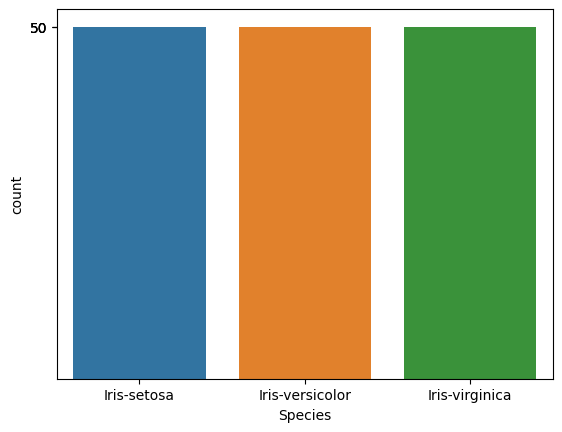

In [6]:
sns.countplot(data=df,x="Species")
f=df["Species"].value_counts()
print(f)
plt.yticks(f)
plt.show()

In [7]:
#check null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

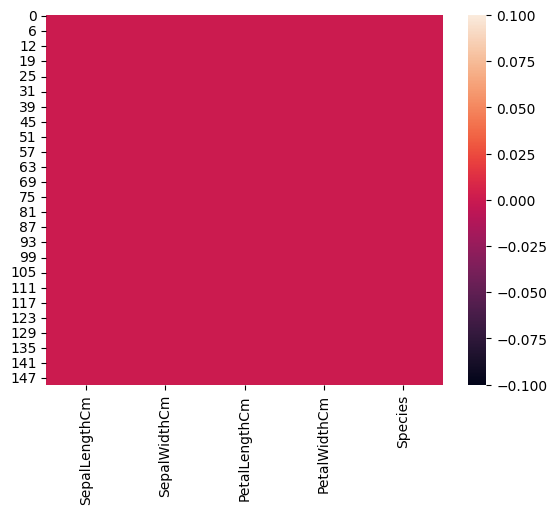

In [16]:
#visualize null value 
sns.heatmap(df.isnull())

In [8]:
#check data type
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
#drop id column parmanent
df.drop('Id',axis=1,inplace=True)

<AxesSubplot:>

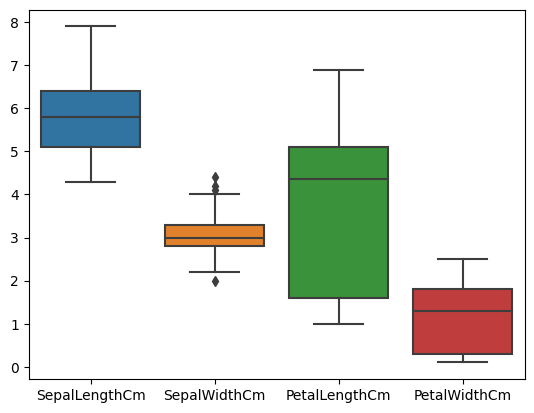

In [10]:
#check outlier
sns.boxplot(data=df)

In [13]:
f=df[(df['SepalWidthCm']>4)].index
print(f)

Int64Index([15, 32, 33], dtype='int64')


In [14]:
#drop outlier in sepalwidthcm
df.drop(f,inplace=True)

<AxesSubplot:>

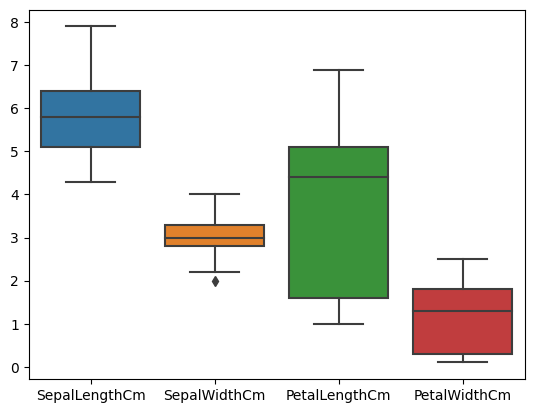

In [15]:
sns.boxplot(data=df)

In [19]:
#Select Input and output from dataset
X=df.drop("Species",axis=1) #input
Y=df["Species"] #output 

In [21]:
#Apply LabelEncoder on output variable species 
from sklearn.preprocessing import LabelEncoder
#create the object of LabelEncoder class
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
Y.dtype

dtype('int32')

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
#apply standardscaler on input column
from sklearn.preprocessing import StandardScaler

In [25]:
#Create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)#on training data
X_test=ss.transform(X_test) #on testing data

In [26]:
#Perform Gaussian NaiveBayes Theorem  : only applied on contineous numerical
#input
#Training the dataset
from sklearn.naive_bayes import GaussianNB
#inbuilt class GaussianNB

In [27]:
#create the object of GaussianNB class
gnb=GaussianNB()

In [28]:
#Train the model with 70% data 
gnb.fit(X_train,Y_train)

GaussianNB()

In [29]:
#testing the model with 30% data
Y_pred=gnb.predict(X_test)

In [30]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[15  0  0]
 [ 0 15  1]
 [ 0  1 13]]
